<a href="https://colab.research.google.com/github/SrNach/ADA-Informes/blob/main/Informe_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Informe Semana 4**
Algoritmo: QuickSort  
Autor: Ignacio Silva

In [110]:
# Librerias a Utilizar
import random as rd
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import statistics as st
import math

#Descripción del Problema

**Problema: Ordenamiento de una secuencia de números.**  
**Entrada:** Un arreglo de largo $n$, tal que $[a_1,a_2,...,a_n]$.  
**Salida:** Un arreglo $[a'_1,a'_2,..,a'_n]$ compuesto por los elementos del arreglo de entrada, pero con un orden lógico tal que $a'_1 \leq a'_2 \leq ...\leq a'_n$.

Podemos encontrarnos con elementos desordenados en muchos lugares, o incluso en tareas cotidianas, es por esto que es necesario indagar y seguir informándose de nuevas maneras de solventar este problema para poder ampliar nuestro conocimiento y aumentar nuestro abanico de herramientas para afrontar nuevos obstaculos, en este caso, ordenar secuencias.

![image.png](https://static.javatpoint.com/programs/images/java-program-to-sort-the-elements-of-an-array-in-ascending-order.png)

#Descripcion del Algoritmo


El algoritmo que analizaremos y utilizaremos será QuickSort, el cuál será implementado de manera dicursiva, siguiendo el paradigma _divide y vencerás_.

QuickSort recibe un arreglo desordenado de largo $n$.  
Los pasos a seguir son los siguientes:
1. Se elige un número como pivote para próximamente dividir el arreglo.
2. Utilizando la función _"partition"_ se divide en dos el arreglo, de manera que el sub-arreglo izquierdo contiene los números menores que el pivote, mientras que el sub-arreglo derecho estará compuesto por los elementos mayores que el pivote.
3. Esta regla se irá repitiendo recursivamente hasta conseguir ordenar el arreglo, de esta forma, los sub-arreglos serán cada vez más cortos.

**Ejemplo paso a paso**  
Como entrada se obtiene el arreglo $[3, 5, 8, 2, 4, 7]$, en el cuál se eligirá como pivote el último elemento.  
Se irá comparando el pivote con los elementos de izquierda a derecha, guardando la posición de los elementos mayores al pivote para poder intercambiarlos luego por los números menores al pivote. 

**Paso 1**  
$[3, 5, 8, 2, 4, 7]$ → Pivote: 7  

$¿ 3 < 7 ?$ Si, pero como todavía no hay números mayores al pivote, se ignora.  
$¿ 5 < 7 ?$ Si, pero también se ignora.  
$¿ 8 < 7 ?$ No, por lo que se guardará esta posición para mas tarde.  
$¿ 2 < 7 ?$ Si, entonces se intercambiará por el número mayor encontrado antes.  

$[3, 5, 2, 8, 4, 7]$  

$¿ 4 < 7 ?$ Si, entonces se intercambiará por el primer mayor encontrado.

$[3, 5, 2, 4, 8, 7]$  
Se terminó de recorrer el arreglo. Como último paso, se intercambia el pivote por el primer mayor encontrado.   
**Resultado:** → $[3, 5, 2, 4, 7, 8]$

**Paso 2**  
Se dividirá este arreglo en dos, como mitad el pivote anterior, sin incluir el pivote en ninguno de los sub-arreglos divididos. Como el sub-arreglo derecho solo está compuesto por un elemento, no se hará este proceso.  
$[3, 5, 2, 4]$ → Pivote: 4

$¿ 3 < 4 ?$ Si, se debería intercambiar por el primer mayor encontrado, pero no hay.  
$¿ 5 < 4 ?$ No, por lo que se guardará esta posición para más tarde.  
$¿ 2 < 4 ?$ Si, por lo que se hace el cambio con el primer mayor. 

$[3, 2, 5, 4]$

Por último se cambiará el pivote por el primer número mayor que el pivote encontrado, por lo que se intercambia con el número $5$.

**Resultado:** → $[3, 2, 4, 5]$

**Paso 3**  
Como se comentó anteriormente, con los sub-arreglos de largo $1$ no se utilizará la función _"partition"_, por lo que sólo se procesará el sub-arreglo izquierdo.  
$[3, 2]$ → Pivote: 2

$¿ 3 < 2 ?$ No, por lo que este número es el primer mayor encontrado, y como no se recorrerá más este sub-arreglo, sólo se intercambiarán entre sí.

**Resultado:** → $[2, 3]$
 
Como aclaración, en ningún momento se dividió realmente este arreglo, sólo se trabajaba con sub-arreglos mediante el control de índices, así que el arreglo se modificaba de manera que se ordenaba poco a poco.  Como consecuencia se unen: $[2, 3]$, el pivote $4$, $[5]$, el pivote $7$ y $[8]$.  
Finalmente se consigue el arreglo $[2, 3, 4, 5, 7, 8]$.  
Como es posible observar, este arreglo contiene los mismos elementos que el arreglo de entrada, pero se encuentra ordenado, por lo que cumplió el objetivo principal.

#Implementación del Algoritmo


Como se explicó anteriormente, el algoritmo QuickSort se implementará de manera recursiva, y en conjunto con la función _"partition"_ irán ordenando los arreglos que se le entreguen.

**qsort:** Esta función es la encargada de sub-dividir el arreglo, con el sub-arreglo izquierdo con números menores que el pivote, y el derecho con mayores al pivote (Sin incluir el pivote en ninguno de los dos). Terminará de llamarse recursivamente cuando el sub-arreglo sea de largo $1$.

**partition:** La función "_partition_" es la responsable de ordenar y separar los elementos menores con los mayores, a la izquierda y derecha respectivamente, y dejar el pivote entre estos dos sub-arreglos, finalmente retorna el índice del pivote, para que sea posible separar mediante la llamada recursiva de _"qsort"_ el arreglo.

Además, la función partition está programada de manera que podamos elegir la posición de nuestro pivote:
- En el primer elemento.
- El último elemento.
- La mediana del sub-arreglo.

In [166]:
# PARTITION
def partition(A,l,h):
  global verbose, pcount, compcount, pivot
  pcount+=1

  if pivot==0: piv = np.percentile(A[l:h], 50)
  elif pivot==1: piv = A[l]
  else: piv=A[h]

  i=l-1

  if verbose: print(colored(f"Partition {pcount}:\n{A[l:h+1]}","green"))

  for j in range(l,h):
    if verbose: print(colored(f"¿{piv} > {A[j]}?","blue"))

    compcount+=1
    if piv>A[j]:
      i+=1
      A[j],A[i] = A[i],A[j]
      if verbose:print(colored("Si","red"),"→",A[l:h+1],"\n")
    elif verbose: print(colored("No","red"),"→ Sin Cambios\n")
  
  i+=1
  A[i],A[h] = A[h],A[i]
  return i

# QUICKSORT
def qsort(A,l,h):
  global rcalls
  if l<h:
    m = partition(A,l,h)

    rcalls+=1; qsort(A,l,m-1)
    rcalls+=1; qsort(A,m+1,h)
  else: rcalls-=1

In [168]:
# MAIN
n = rd.randint(5, 10)
A = rd.sample(range(1, 100),n)

verbose=False
compcount=0 # Comparations made
pcount=0 # Partition calls counter
rcalls=0 # recursive calls of qsort

pivot = 5 # 0=median, 1=low, otherwise high

print(colored("Entrada:","red"),A)
qsort(A, 0, n-1)
print(colored("Salida: ","red"),A)
print(colored("Llamadas de QSort:","red"),rcalls)
print(colored("Comparaciones Partition:","red"),compcount)

Entrada: [15, 77, 78, 6, 9]
Salida:  [6, 9, 15, 77, 78]
Llamadas de QSort: 1
Comparaciones Partition: 6


###**Ejemplo con _verbose = True_**
A continuación se encuentra un ejemplo con el proceso explicado paso a paso, durante el algoritmo QuickSort.

In [169]:
n = rd.randint(5, 10)
A = rd.sample(range(1, 100),n)
verbose=True
compcount=0 # Comparations made
pcount=0 # Partition calls counter
rcalls=0 # recursive calls of qsort
pivot = 5

print(colored("Entrada:","red"),A,"\n")
qsort(A, 0, n-1)
print(colored("Salida:","red"),A)
print(colored("Llamadas Recursivas:","red"),rcalls)
print(colored("Comparaciones Partition:","red"),compcount)

Entrada: [21, 1, 96, 24, 63, 55, 35, 91] 

Partition 1:
[21, 1, 96, 24, 63, 55, 35, 91]
¿91 > 21?
Si → [21, 1, 96, 24, 63, 55, 35, 91] 

¿91 > 1?
Si → [21, 1, 96, 24, 63, 55, 35, 91] 

¿91 > 96?
No → Sin Cambios

¿91 > 24?
Si → [21, 1, 24, 96, 63, 55, 35, 91] 

¿91 > 63?
Si → [21, 1, 24, 63, 96, 55, 35, 91] 

¿91 > 55?
Si → [21, 1, 24, 63, 55, 96, 35, 91] 

¿91 > 35?
Si → [21, 1, 24, 63, 55, 35, 96, 91] 

Partition 2:
[21, 1, 24, 63, 55, 35]
¿35 > 21?
Si → [21, 1, 24, 63, 55, 35] 

¿35 > 1?
Si → [21, 1, 24, 63, 55, 35] 

¿35 > 24?
Si → [21, 1, 24, 63, 55, 35] 

¿35 > 63?
No → Sin Cambios

¿35 > 55?
No → Sin Cambios

Partition 3:
[21, 1, 24]
¿24 > 21?
Si → [21, 1, 24] 

¿24 > 1?
Si → [21, 1, 24] 

Partition 4:
[21, 1]
¿1 > 21?
No → Sin Cambios

Partition 5:
[55, 63]
¿63 > 55?
Si → [55, 63] 

Salida: [1, 21, 24, 35, 55, 63, 91, 96]
Llamadas Recursivas: 4
Comparaciones Partition: 16


#Propiedades

###**Tiempo de ejecución**
**Método Maestro:**  
Se calculará el tiempo de ejecución del algoritmo mediante el método maestro.  
Sabemos que QuickSort es un algoritmo recursivo, que se va dividiendo en dos partes en el mejor y caso promedio, por lo que la función que lo representa es: 
-  $T(n) = 2T(n/2) + O(n)$

Analizando esta estructura: $T(n) = aT(n/b) + O(n^d)$  
y siguiendo estas reglas:  

![image.png](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F6be820c4-964e-44c1-acbd-db888889e8df%2FUntitled.png?table=block&id=1f05807a-07c4-4bd5-a59a-4402523d7383&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=2000&userId=&cache=v2)

Se puede calcular el tiempo de ejecución, teniendo que $a = 2$, $b = 2$, y $d = 1$, observamos que se cumple la condición $a = b^d$, como consecuencia podemos afirmar que el tiempo de ejecución de QuickSort es:
- $Ω(n \cdot logn)$ para el mejor caso.  
- $O(n \cdot logn)$ para el caso promedio.  

**Árbol Recursivo:**  
También analizaremos el árbol recursivo del algoritmo para respaldar la información obtenida en el estudio anterior sobre el mejor y caso promedio.  
Sabemos que el tiempo de ejecución es representada por $T(n) = 2T(n/2) + O(n)$, entonces podemos decir que el arreglo se va dividiendo en dos ramas, cada una de ellas conformada por una mitad del arreglo anterior, resultando en un árbol recursivo como el que se encuentra a continuación:  

![image.png](https://cdn.kastatic.org/ka-perseus-images/21cd0d70813845d67fbb11496458214f90ad7cb8.png)

Para calcular el tiempo de ejecución de todo el algoritmo, se debe multiplicar la altura del árbol, por el tiempo que tarda en ejecutar cada nivel, teniendo como factores $logn \cdot cn$, resultando como producto $cnlogn$, es decir, complejidad temporal $O(n \cdot logn)$.

El peor caso es diferente, y se presenta cuando el arreglo de entrada ya se encuentra ordenado, y se escoge como pivote el último o el primer elemento, por consiguiente, un arreglo de largo $n$ se divide en dos arreglos, un sub-arreglo de largo $n-1$, y otro de largo $1$. Se puede construir el siguiente árbol recursivo:  

![image.png](https://www.baeldung.com/wp-content/uploads/sites/4/2020/08/Capture-768x509.png)
)

Analizando el árbol recursivo, podemos darnos cuenta que el tiempo de ejecución se puede calcular de esta manera:  
- $n + (n-1) + (n-2) + (n-3) + (n-4) + ... + 2$

Este calculo se puede reescribir como $[n(n-1)/2] -1$, obteniendo como resultado $(n^2 - n)/2 - 1$, donde es observable que el polinomio de mayor grado es $n^2$, de esta forma podemos afirmar que el tiempo de ejecución de QuickSort en el peor caso es: $O(n^2)$.


###**Prueba de Correctitud**
Para probar si QuickSort es correcto o no, utilizaremos **inducción matemática**. Para esto es necesario comprobar que ocurre durante el proceso en un arreglo de largo $n$, en dos casos específicos:
- **Caso base:** Cuando $n = 1$.
- **Caso General:** Cuando el arreglo es de largo $m$, con $m < n$.

En el caso base, el arreglo tiene sólo elemento, esto quiere decir que no tiene nada que hacer, y retorna este único número.  
Para el caso general, si tenemos un arreglo de largo $n$, este se sub-divide en dos, debido a la función *partition*, esto hace que ahora los arreglos tenga menor largo, y se van sub-dividiendo hasta que los sub-arreglos de largo $1$.  
Dicho esto, se puede afirmar que el algoritmo QuickSort es correcto para arreglos de largo $n$.

#Análisis y Experimentos

###**Competitividad del Algoritmo**
Para este estudio compararemos QuickSort con diferentes algoritmos para enterarse de la capacidad de éste, en diferentes ámbitos.

El siguiente algoritmo corresponde al algoritmo **HeapSort**, el cual usaremos para nuestros experimentos.

In [11]:
# HEAPSORT
def heapify(arr, N, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    global compHS
    compHS+=3
    if l < N and arr[largest] < arr[l]:
        largest = l
    if r < N and arr[largest] < arr[r]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
        heapify(arr, N, largest)
def heapSort(arr):
    N = len(arr)
    for i in range(N//2 - 1, -1, -1):
        heapify(arr, N, i)
    for i in range(N-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
# This code is contributed by Mohit Kumra
# Code from https://www.geeksforgeeks.org/heap-sort/

Este algoritmo también lo utilizaremos para los futuros análisis y estudios. Este código pertenece al algoritmo **MergeSort**.

In [10]:
# MERGESORT
def msort(A):
  if (len(A) > 1):
    mid = len(A)//2
    left = A[:mid]
    right = A[mid:]
    msort(left)
    msort(right)

    i = j = k = 0
    ll = len(left); lr = len(right)

    global compMG
    while (i < ll and j < lr):
      compMG+=1
      if (left[i] < right[j]):
        A[k] = left[i]
        i+=1
      else:
        A[k] = right[j]
        j+=1
      k+=1
    while (i < ll):
      A[k] = left[i]
      i+=1
      k+=1
    while (j < lr):
      A[k] = right[j]
      j+=1
      k+=1

**Cantidad de Comparaciones**  

Este experimento estará dirigido a la cantidad de comparaciones que hace cada algoritmo durante su proceso, y con los gráficos resultantes, veremos la diferencia entre estos.  
Para esto se utilizarán arreglos de largo $n$, con $n \in [5, 500]$ conteniendo números $\in [1, 1000]$.

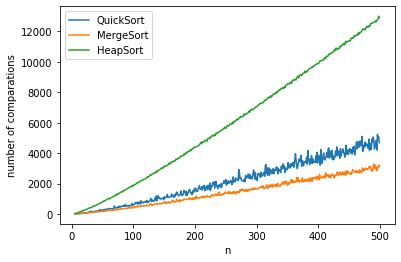

In [37]:
x=[n for n in range(5,500)] 
y=[]; y2=[]; y3=[]

verbose = False
for n in range(5,500):
  compcount = 0 # counter for QuickSort
  compMG = 0 # for MergeSort
  compHS = 0 # for HeapSort

  a = rd.sample(range(1, 1000), n) #QS
  b = np.copy(a) #MS
  c = np.copy(a) #HS

  qsort(a, 0, n-1)
  msort(b)
  heapSort(c)

  y.append(compcount)
  y2.append(compMG)
  y3.append(compHS)

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["QuickSort", "MergeSort", "HeapSort"])

plt.xlabel('n')
plt.ylabel('number of comparations')
plt.show()

Se observa que entre los algoritmo MergeSort y QuickSort no hay demasiada diferencia, pero MergeSort logra ordenar los arreglos en menos comparaciones, siendo el más viable cuando hablamos de comparaciones.  
En cambio, HeapSort sobrepasa por mucho a los otros dos algoritmos en las cantidades de comparaciones hechas durante el ordenamiento, poniéndolo en último lugar.

**Tiempo de Ejecución**

Haremos algo parecido al experimento anterior, pero ahora veremos cuanto tardan los algoritmos QuickSort y MergeSort en ordenar arreglos de largo $n$, con $n \in [5, 500]$ conteniendo números $\in [1, 1000]$.

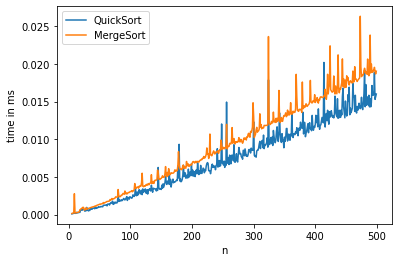

In [47]:
x=[]; y=[]; y2=[]

for n in range(5,500):
  a = rd.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import qsort", stmt=f"qsort({a},{0},{n-1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import msort", stmt=f"msort({a})", repeat = 1, number = 10)

  x.append(n)
  y.append(t)
  y2.append(t2)

plt.plot(x,y)
plt.plot(x, y2)
plt.legend(["QuickSort","MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Hay poca diferencia en el tiempo de ejecución de estos dos algoritmos, pero se puede observar que el más rápido de estos es QuickSort, ordenando en menos tiempo los arreglos entregados.

###**Casos Teóricos**
Compararemos la diferencia de la cantidad de comparaciones hechas de QuickSort durante el proceso real con los mejores, peores y casos promedios teóricos calculándolos matemáticamente.  
Para este estudio se utilizarán arreglos de largo $n$, con $n \in [5, 50]$ compuestos por números $\in [1, 100]$.

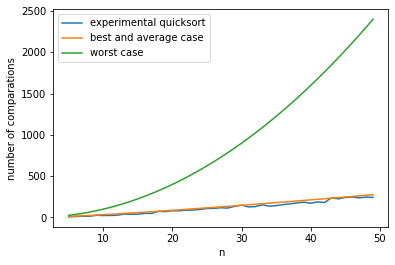

In [125]:
x=[n for n in range(5,50)] 
y1=[n*math.log2(n) for n in range(5,50)] # best and average case
y2=[n*n for n in range(5, 50)]
y=[]; 

verbose = False
pivot = 5
for n in range(5,50):
  compcount = 0
  a = rd.sample(range(1, 100), n)
  qsort(a, 0, n-1)
  y.append(compcount)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["experimental quicksort", "best and average case", "worst case"])

plt.xlabel('n')
plt.ylabel('number of comparations')
plt.show()

A pesar de que el peor caso es posible, se puede observar que la probabilidad de que ocurra es ínfima, centrándose más en los mejores y casos promedios, en donde la complejidad es $O(n \cdot logn)$.

###**Diferencia de Pivotes**
Para este estudio utilizaremos las distintas posiciones donde se puede situar el pivote a la hora de llamar a la función *partition*, en el primer elemento, segundo elemento y la mediana.
Para este gráfico usaremos arreglos de largo $n$, con $n \in [5, 100]$ compuestos por números $\in [1, 1000]$.

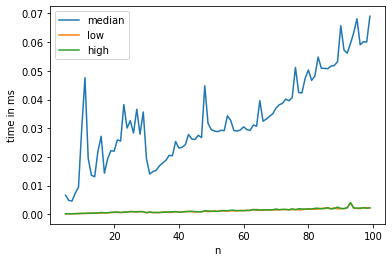

In [180]:
x=[]; y=[]; y2=[];y3=[]

verbose = False
for n in range(5,100):
  a = rd.sample(range(1, 1000), n)
  b = rd.sample(range(1, 1000), n)
  c = rd.sample(range(1, 1000), n)


  pivot = 0
  t = repeat(setup="from __main__ import qsort", stmt=f"qsort({a},{0},{n-1})", repeat=1, number=10)
  pivot = 1
  t2 = repeat(setup="from __main__ import qsort", stmt=f"qsort({b},{0},{n-1})", repeat=1, number=10)
  pivot = 2
  t3 = repeat(setup="from __main__ import qsort", stmt=f"qsort({c},{0},{n-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)
  y3.append(t3)

plt.plot(x,y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(["median","low", "high"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Se puede apreciar que con el pivote en la mediana el tiempo de ejecución es mayor. Esto puede ser debido a que calcular la mediana del sub-arreglo toma bastante tiempo, y esto se suma al tiempo de ejecución. !uizás utilizando una mejor forma de conseguir mediana se pueda ahorrar tiempo.